In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [103]:
csvFile = "stemmed_hate_speech"

In [104]:
data = loadCSV(csvFile)

In [105]:
data.head()

,tweet_text,confidence,tweet_class
0,warn penni board make faggot,0.6013,1
1,fuck dyke,0.7227,2
2,[@] [@] [@] [@] [@] least look like jefre star...,0.5229,2
3,[@] [@] [@] fag jacki jealou neeeee,0.5184,2
4,[@] heard bitch way back th texa wtf talk bitc...,0.5185,1


In [106]:
data.tail()

,tweet_text,confidence,tweet_class
13069,sorri offend white supremacist aryan nation ne...,0.3418,0
13070,[@] caucasian euro aryan whatev realli doesnt ...,0.6804,0
13071,[@] sir patient name aryan khan villag meeranp...,1.0000,0
13072,[@] happi birthday bro happi year ahead,1.0000,0
13073,[@] aryan kapoor cute name tho want kamp first...,1.0000,0


# Calculate Frequency of Unique Words by Class

In [107]:
def iterateFreq(dictionary, word):
    if dictionary.get(word, False):
        dictionary[word] += 1
    else:
        dictionary[word] = 1

In [108]:
def wordFrequencies(dataframe):
    all_tweets = {}
    neutral = {}
    offensive = {}
    hate = {}
    
    for index, row in dataframe.iterrows():
        tweet = row[0]
        tweet_class = row[2]
        
        tweet_words = tweet.split()
        
        for word in tweet_words:
            if tweet_class == 0:
                iterateFreq(neutral, word)
            elif tweet_class == 1:
                iterateFreq(offensive, word)
            elif tweet_class == 2:
                iterateFreq(hate, word)
                
            iterateFreq(all_tweets, word)
    
    return all_tweets, neutral, offensive, hate

In [109]:
def dispWordFreq(dictionary):
    unique_words = sorted( ((v,k) for k, v in dictionary.items()), reverse = True)
    for v, k in unique_words:
        word_val = "%s: %d" % (k, v)
        print(word_val)

In [110]:
all_wf, neutral_wf, offensive_wf, hate_wf = wordFrequencies(data)

In [111]:
all_wf_len = len(all_wf)
neutral_wf_len = len(neutral_wf)
offensive_wf_len = len(offensive_wf)
hate_wf_len = len(hate_wf)

In [112]:
all_wf_len, neutral_wf_len, offensive_wf_len, hate_wf_len

(14019, 10603, 5902, 3549)

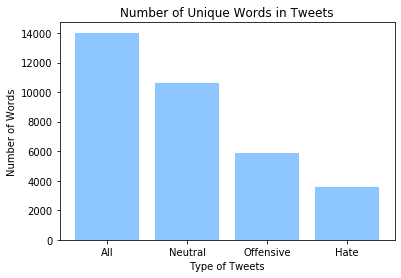

In [113]:
tweets = ['All', 'Neutral', 'Offensive', 'Hate']
y_pos = np.arange(len(tweets))
lengths = [all_wf_len, neutral_wf_len, offensive_wf_len, hate_wf_len]

plt.bar(y_pos, lengths, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, tweets)
plt.xlabel('Type of Tweets')
plt.ylabel('Number of Words')
plt.title('Number of Unique Words in Tweets')

plt.show()

# Find the Distribution of Unique Words

In [114]:
def sortedWordFreq(dictionary):
    unique_words = sorted( ((v,k) for k, v in dictionary.items()), reverse = True)
    sorted_dict = {}
    for v, k in unique_words:
        sorted_dict[k] = v
    return sorted_dict

In [115]:
sorted_all_wf = sortedWordFreq(all_wf)
sorted_neutral_wf = sortedWordFreq(neutral_wf)
sorted_offensive_wf = sortedWordFreq(offensive_wf)
sorted_hate_wf = sortedWordFreq(hate_wf)

In [116]:
del sorted_all_wf['[@]']
del sorted_all_wf['[link]']
del sorted_neutral_wf['[@]']
del sorted_neutral_wf['[link]']
del sorted_offensive_wf['[@]']
del sorted_offensive_wf['[link]']
del sorted_hate_wf['[@]']
del sorted_hate_wf['[link]']

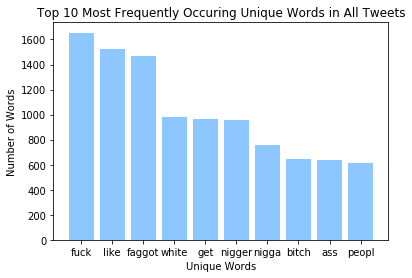

In [117]:
all_tweets = [w for w in list(sorted_all_wf.keys())[0:10]]
y_pos = np.arange(len(all_tweets))
lengths = [int(sorted_all_wf[w]) for w in list(sorted_all_wf.keys())[0:10]]

plt.bar(y_pos, lengths, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, all_tweets)
plt.xlabel('Unique Words')
plt.ylabel('Number of Words')
plt.title('Top 10 Most Frequently Occuring Unique Words in All Tweets')

plt.show()

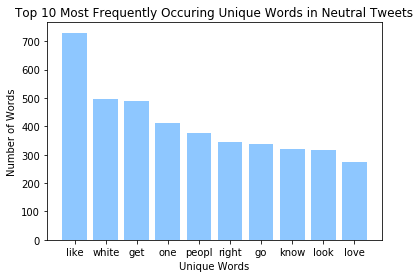

In [118]:
neutral_tweets = [w for w in list(sorted_neutral_wf.keys())[0:10]]
y_pos = np.arange(len(neutral_tweets))
lengths = [int(sorted_neutral_wf[w]) for w in list(sorted_neutral_wf.keys())[0:10]]

plt.bar(y_pos, lengths, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, neutral_tweets)
plt.xlabel('Unique Words')
plt.ylabel('Number of Words')
plt.title('Top 10 Most Frequently Occuring Unique Words in Neutral Tweets')

plt.show()

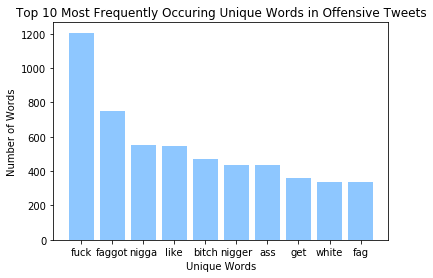

In [119]:
offensive_tweets = [w for w in list(sorted_offensive_wf.keys())[0:10]]
y_pos = np.arange(len(offensive_tweets))
lengths = [int(sorted_offensive_wf[w]) for w in list(sorted_offensive_wf.keys())[0:10]]

plt.bar(y_pos, lengths, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, offensive_tweets)
plt.xlabel('Unique Words')
plt.ylabel('Number of Words')
plt.title('Top 10 Most Frequently Occuring Unique Words in Offensive Tweets')

plt.show()

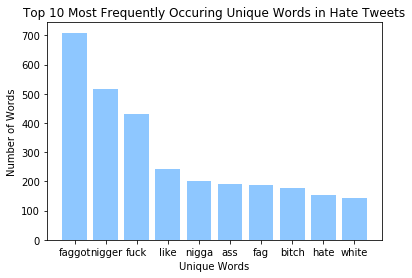

In [120]:
hate_tweets = [w for w in list(sorted_hate_wf.keys())[0:10]]
y_pos = np.arange(len(hate_tweets))
lengths = [int(sorted_hate_wf[w]) for w in list(sorted_hate_wf.keys())[0:10]]

plt.bar(y_pos, lengths, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, hate_tweets)
plt.xlabel('Unique Words')
plt.ylabel('Number of Words')
plt.title('Top 10 Most Frequently Occuring Unique Words in Hate Tweets')

plt.show()